In [1]:
# %matplotlib nbagg
# %matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import pickle
from datetime import datetime

sys.path.append("..")
# 自分のpath
os.chdir("/home/nakamura/HAI/main_server/hai")

import coloredlogs, logging
logger = logging.getLogger(__name__)
coloredlogs.install(level='CRITICAL', logger=logger)

import pymongo
from pymongo import MongoClient
from PIL import Image
from matplotlib import pylab as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation
import numpy as np
import scipy
from bson.objectid import ObjectId
from sklearn.decomposition import PCA

from notebooks.utils.utils import visualize, display_latest_image, display_image, print_time, strtime_to_epoch, epoch_to_strtime, UpdateDist, display_two_images
from controllers.learner.img2vec import NNFeatures
import controllers.learner.datasets as ds
from controllers.tests.hue_lv2 import HueLv2

mongo = MongoClient('localhost', 20202).hai
from flask import Flask
app = Flask(__name__)
app.config.from_pyfile(filename="application.cfg")

True

In [2]:
X = pickle.load(open('X-08.pkl', 'rb'))
y = pickle.load(open('y-08.pkl', 'rb'))
hue_lv2 = HueLv2('koki', debug=True, xy=(X, y))

2017-12-10 08:10:59


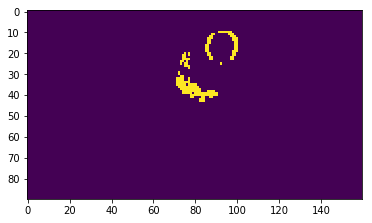

In [3]:
%matplotlib inline
display_image(hue_lv2.X[2][0], diff=True)

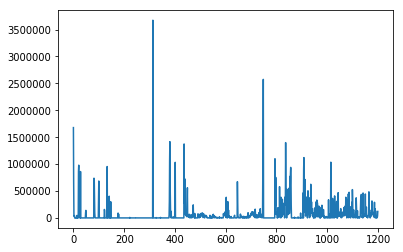

In [5]:
diff_val = []
for i in range(len(hue_lv2.X)):
# for i in range(550, 650):
    try:
        diff_val.append(scipy.misc.imread("./images/raw_images/" + hue_lv2.X[i][0]['diff_filename']).sum())
    except:
        diff_val.append(diff_val[-1])
plt.plot(diff_val)

In [ ]:
a = np.array(diff_val)